# Import Libraries

In [61]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt


# Load the dataset

The `fetch_20newsgroups` dataset is a popular text dataset provided by the scikit-learn library. It contains a collection of approximately 20,000 newsgroup documents, which are categorized into 20 different newsgroups. Each document is a post from a specific newsgroup (similar to a forum or online discussion group), and the dataset is often used for experiments in text classification and clustering.


Example categories:

* comp.graphics
* comp.os.ms-windows.misc
* comp.sys.ibm.pc.hardware
* comp.sys.mac.hardware
* rec.autos
* rec.motorcycles
* rec.sport.baseball
* rec.sport.hockey
* sci.crypt
* sci.electronics
* sci.med
* sci.space
* talk.politics.misc
* talk.politics.guns
* talk.politics.mideast
* talk.religion.misc
* alt.atheism
* soc.religion.christian
* misc.forsale

In [62]:
categories = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball', 'sci.med', 'misc.forsale']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Access the text data (list of documents)
documents = newsgroups.data
print(len(documents))

4731


In [63]:
print(documents[0])

From: carrd@iccgcc.decnet.ab.com
Subject: Re: David Wells
Lines: 5

Has David Wells landed with a team yet?  I'd think the Tigers with their 
anemic pitching would grab this guy pronto!

DC




In [64]:
print(documents[30])

From: af774@cleveland.Freenet.Edu (Chad Cipiti)
Subject: Good shareware paint and/or animation software for SGI?
Organization: Case Western Reserve University, Cleveland, OH (USA)
Lines: 15
Reply-To: af774@cleveland.Freenet.Edu (Chad Cipiti)
NNTP-Posting-Host: hela.ins.cwru.edu


Does anyone know of any good shareware animation or paint software for an SGI
 machine?  I've exhausted everyplace on the net I can find and still don't hava
 a nice piece of software.

Thanks alot!

Chad


-- 
Knock, knock.                                         Chad Cipiti
Who's there?                                    af774@cleveland.freenet.edu
                                               cipiti@bobcat.ent.ohiou.edu
It might be Heisenberg.                          chad@voxel.zool.ohiou.edu



#TfidfVectorizer

The `TfidfVectorizer` is a tool provided by the `scikit-learn` library in Python. It is used to convert a collection of text documents into a matrix of numerical features based on the TF-IDF (Term Frequency-Inverse Document Frequency) representation. This numerical representation is crucial for applying machine learning algorithms to text data.

### Breakdown of the Components:
**TF-IDF (Term Frequency-Inverse Document Frequency)**:

- **Term Frequency (TF)**: This measures how frequently a term (word) appears in a document. The more frequently a word appears in a document, the higher its TF value.

$$ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $$

- **Inverse Document Frequency (IDF)**: This measures how important a term is by reducing the weight of terms that appear in many documents and increasing the weight of terms that are unique to a few documents.

$$ \text{IDF}(t) = \log \left(\frac{\text{Total number of documents}}{\text{Number of documents containing the term } t}\right) $$

- **TF-IDF Score**: The TF-IDF score for a term in a document is the product of its TF and IDF values. This score reflects the importance of a word to a document in a collection relative to its occurrence across the entire collection.

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

The TF-IDF score helps prioritize unique and significant words in each document while down-weighting common words that appear across many documents.

### Vectorization:

The `TfidfVectorizer` converts the text data into a matrix where each row represents a document, and each column represents a term (word). The value in each cell of this matrix is the TF-IDF score for that term in that document.

### Stop Words:

Stop words are common words in a language that are often removed before processing the text because they don't carry significant meaning (e.g., "and," "the," "is").
The `stop_words='english'` parameter tells the `TfidfVectorizer` to automatically remove English stop words from the text during the vectorization process.


In [65]:
vectorizer = TfidfVectorizer(stop_words='english') # remove all  the stop words
X = vectorizer.fit_transform(newsgroups.data)

In [66]:
print(X)

  (0, 16631)	0.18959235364535612
  (0, 38135)	0.2729364002765319
  (0, 23629)	0.15589873651407668
  (0, 23150)	0.2284147685944887
  (0, 36835)	0.1594278548013447
  (0, 8514)	0.28069223797184295
  (0, 46738)	0.19656709853510687
  (0, 46535)	0.08809361511190625
  (0, 46037)	0.13520361402160905
  (0, 29003)	0.25660040560777214
  (0, 29718)	0.034897005524428745
  (0, 50186)	0.49106371213761735
  (0, 16571)	0.24705535381977542
  (0, 44919)	0.034757167077573134
  (0, 14478)	0.06965048033365795
  (0, 7061)	0.1778975319001479
  (0, 16801)	0.2612415785313237
  (0, 25474)	0.29069125182927197
  (0, 12858)	0.29069125182927197
  (1, 9979)	0.13516834503578373
  (1, 27648)	0.07367476944886191
  (1, 37911)	0.14328288713932047
  (1, 16596)	0.07123539787976232
  (1, 3512)	0.10644810852288572
  (1, 34994)	0.07878388017509373
  :	:
  (4730, 44359)	0.056969050233258114
  (4730, 18305)	0.03812132443548385
  (4730, 17723)	0.0422036780702261
  (4730, 38399)	0.03376780830771083
  (4730, 45306)	0.03369608308547

`(0, 17524)	0.09728377110441032`
## What is 17524? ()
Imagine you have a huge list of all the unique words from a bunch of text documents. Each word gets a unique number so we can easily refer to it. The number 17524 is just one of these unique numbers assigned to a word in this list.

Steps to Understand It:

When you use tools like TfidfVectorizer, it first looks at all your documents and makes a list of all the unique words. This list is called a vocabulary.
Each word in this list gets a unique number. For example, the word "apple" might get the number 0, "banana" might get the number 1, and so on.

In the vocabulary list, the number 17524 represents a specific word. It’s like a code for that word. If you know this number, you can find out which word it represents.

To find out which word the number 17524 corresponds to, you need to look up the vocabulary list created by the TfidfVectorizer.

# Clustering the documents into 4 clusters

In [67]:

k = 4  # Number of clusters
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=42)
model.fit(X)


KMeans(max_iter=100, n_clusters=4, n_init=1, random_state=42)

# Assign clusters to documents

In [68]:
labels = model.labels_

In [69]:
print(labels)

[2 0 0 ... 3 0 1]


# Display some documents from each cluster

In [70]:
for i in range(k):
    print(f"Cluster {i}:")
    # Get indices of documents that belong to the current cluster
    cluster_docs = np.where(labels == i)[0]
    # Print the first 3 documents in this cluster
    for doc_index in cluster_docs[:3]:
        print(newsgroups.data[doc_index])
        print("\n" + "-"*80 + "\n")

Cluster 0:
From: jb@access.digex.com (jb)
Subject: [Genesis] More GAMES FOR SALE (Updated and Expanded)
Organization: Express Access Online Communications, Greenbelt, MD USA
Lines: 14
Distribution: na
NNTP-Posting-Host: access.digex.net

Sega Genesis Games For Sale:  (All these games just $25 each!)

Galaxy Force II
Jordan vs. Bird (One on One, shoot-outs, etc.)
Powerball
Test Drive II: The Duel (comes in box)
Valis III by Renovation

Also for sale:
Sportstalk Football '93 starring Joe Montana	$35

All games include manual and case.  Shipping is $4 per order (2nd day priority).

John Baker


--------------------------------------------------------------------------------

From: ralf@iqsc.COM (Ralf)
Subject: Items For Sale
Organization: IQ Software Corp.
Lines: 24

  ITEMS FOR SALE - PRICE LISTED OR BEST OFFER!!!!!!!

KFC SVGA Monitor 1024X768 .28DP Non-interlaced 14" 
Screen, still under warranty! (Brand New)          $ 290.00

1200 Baud Compuadd Modem Box/docs/software         $  20.0

# Plot the clustering result (for 2D visualization)

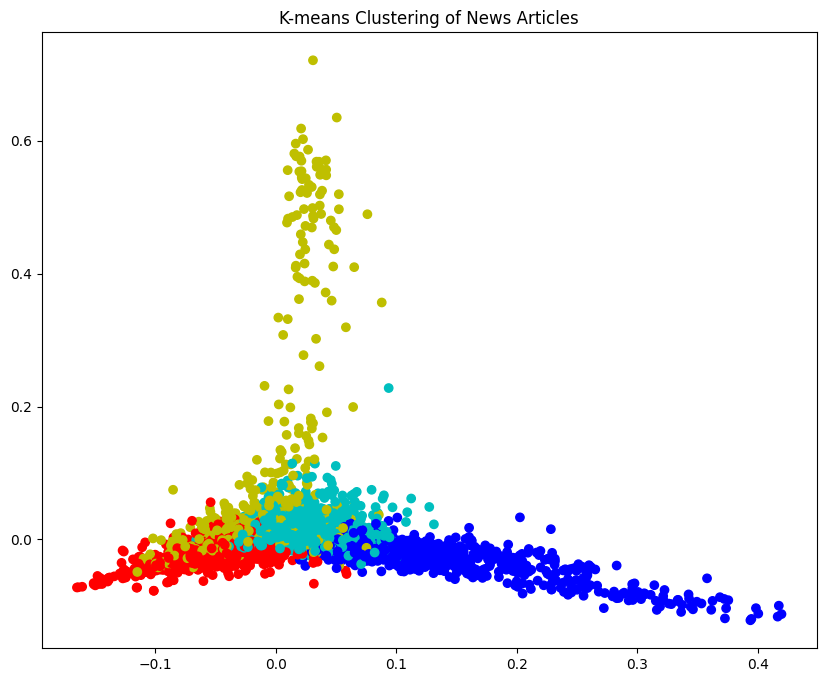

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

colors = ["r", "b", "c", "y"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=[colors[d] for d in labels])
plt.title("K-means Clustering of News Articles")
plt.show()
